# EXISTING: Data Analysis
- Will be making 3 data frames: Male Rapper Lyrics, Female Rapper Lyrics, and All Lyrics


In [1]:
# import libraries
import pandas as pd
import os, json
import nltk
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, NMF
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Trying out DataFrames with Small Dataset
- I used the `Lyrics_2Pac.json` to do this inital exploration
- The following code chunks deal with creating this initial dataframe `pac_lyrics_df` with the 2Pac information
- It includes finding out what types of object get formed in the process

In [2]:
# Trying out doing a data frame with one of the male artists: "2Pac"
m_path = './rap_lyrics/male_lyrics/'    # path with the male artists
# Pass the JSON into a dictionary
with open(m_path+'Lyrics_2Pac.json') as json_file:
    data = json.load(json_file)
# confirming that it is a dictionary type object   
type(data)    # It is!
# print out the keys to see where the song lyrics may be held
data.keys()   # It should be in 'songs'

dict

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'description_annotation', 'user', 'songs'])

In [3]:
# build a data frame from dictionary using pd.DataFrame.from_dict
pac_lyrics_df = pd.DataFrame.from_dict(data['songs'])
# data frame should have the columns 'artist', 'title' (for song title), and 'lyrics'
pac_lyrics_df = pac_lyrics_df[['artist', 'title', 'lyrics']]
# did it populate correctly?
pac_lyrics_df.head() # it did!

,artist,title,lyrics
0,2Pac,16 on Death Row,Death Row\nThat's where mothafuckas is endin' ...
1,2Pac,1995 Police Station Testimony,"Woman – Sir, will you raise your right hand, p..."
2,2Pac,1 for April,2 me your name alone is poetry\nI barely know ...
3,2Pac,1st impression,Just when I thought I'd seen it all\nour paths...
4,2Pac,1st Impressions: 4 Irene,Just when I thought I'd seen it all\nour paths...


## Now let's try it with the full male artist directory
- The following code chunk populates the official male lyrics dataframe (`mlyrics_df`) with the data from the 10 males artists:
    - J.Cole, Jay-Z, Kanye West, The Notorious B.I.G., Kendrick Lamar, Lil Wayne, Snoop Dogg, Nas, Drake, 2Pac
    - This code uses the code from the previous chunks

In [4]:
# empty df for male lyrics with the column titles: artist, title, lyrics
mlyrics_df = pd.DataFrame(columns=['artist', 'title', 'lyrics'])

# for loop to populate mlyrics_df
for filename in [file for file in os.listdir(m_path) if file.endswith('.json')]:
    # prints out a list of the filenames in the directory
    print(filename)
    # read in each filename and load it
    with open(m_path + filename) as json_file:
        data = json.load(json_file)
        # populate a temp_df with necessary info
        temp_df = pd.DataFrame.from_dict(data['songs'])
        temp_df = temp_df[['artist', 'title', 'lyrics']]
        # concatenate temp_df to mlyrics_df
        mlyrics_df = pd.concat([mlyrics_df,temp_df])
        # change indexing from 0-99 for each artist to 0-999 for whole dataset
        mlyrics_df = mlyrics_df.reset_index(drop=True)
mlyrics_df

# making sure the data and the data frame are the correct types
type(data)
type(mlyrics_df)
# these are the right data types!

Lyrics_J.Cole.json
Lyrics_JAYZ.json
Lyrics_KanyeWest.json
Lyrics_TheNotoriousB.I.G..json
Lyrics_KendrickLamar.json
Lyrics_LilWayne.json
Lyrics_SnoopDogg.json
Lyrics_Nas.json
Lyrics_Drake.json
Lyrics_2Pac.json


,artist,title,lyrics
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...
1,J. Cole,102.1 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...
2,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...
3,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ..."
4,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN..."
...,...,...,...
995,2Pac,Flex,"Flex, flex flex\nFlex, flex flex\n\nSlippin' t..."
996,2Pac,Forever And Today,U say that u'll love me forever but what about...
997,2Pac,For Mrs. Hawkins (In Memory of Yusef Hawkins),This poem is addressed 2 Mrs. Hawkins\nwho los...
998,2Pac,Fortune & Fame,"And my niggas say, we want the fame!\nC'mon\n\..."


dict

pandas.core.frame.DataFrame

In [5]:
# 10 artists, 1000 values, 979 unique titles, 993 unique lyrics
    # so there are some duplicates with the titles and the lyrics
mlyrics_df.describe()
# Lil Wayne is the most common artist...why?...all artists have the same number of songs...
# Anything is the most common song title

,artist,title,lyrics
count,1000,1000,1000
unique,10,979,993
top,Lil Wayne,Celebration,
freq,100,3,4


In [6]:
# 1000 for each thing column. Good!
mlyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  1000 non-null   object
 1   title   1000 non-null   object
 2   lyrics  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [7]:
# Every artist has their 100 lyrics as expected
mlyrics_df.artist.value_counts()

Lil Wayne               100
J. Cole                 100
The Notorious B.I.G.    100
Nas                     100
Kendrick Lamar          100
Kanye West              100
Snoop Dogg              100
Drake                   100
JAY-Z                   100
2Pac                    100
Name: artist, dtype: int64

**Observations**:
- There are some duplicates with the titles (**979** vs **1000**) / lyrics (**993** vs **1000**)
- Each artist had `0-99` index and to make things less confusing when calling specific rows, I changed the indexing with `mlyrics_df = mlyrics_df.reset_index(drop=True)`
- All of the value counts for each column checked out (**1000** entries for all)
- Every male artist has **100 lyrics/titles** as expected
- I think I would start cleaning at the song title level to get the duplicates through sampling the data.

## Now let's try it with the full female directory
- The following code chunk populates the official female lyrics dataframe (`flyrics_df`) with the data from the following 10 female artists:
    - Rico Nasty, Missy Elliott, Lil Kim, Cardi B, Remy Ma, Rapsody, Trina, Nicki Minaj, Queen Latifah
    - *Note.* There are less rows in this data frame than the `mlyrics_df` because not all artists reached the 100 songs specified in the data collection code (e.g. Remy Ma [86], Cardi B [76]) 
        - This was expected because Cardi B is a fairly new artist and Remy Ma was incarcerated for a long time and is just now getting back to music.

In [8]:
f_path = './rap_lyrics/female_lyrics/'

# empty df for male lyrics with the column titles: artist, title, lyrics
flyrics_df = pd.DataFrame(columns=['artist', 'title', 'lyrics'])

# for loop to populate mlyrics_df
for filename in [file for file in os.listdir(f_path) if file.endswith('.json')]:
    # prints out a list of the filenames in the directory
    print(filename)
    # read in each filename and load it
    with open(f_path + filename) as json_file:
        data = json.load(json_file)
        # populate a temp_df with necessary info
        temp_df = pd.DataFrame.from_dict(data['songs'])
        temp_df = temp_df[['artist', 'title', 'lyrics']]
        # concatenate temp_df to mlyrics_df
        flyrics_df = pd.concat([flyrics_df,temp_df])
        # change indexing from 0-99 for each artist to 0-999 for whole dataset
        flyrics_df = flyrics_df.reset_index(drop=True)
flyrics_df

# making sure the data and the data frame are the correct types
type(data)
type(flyrics_df)
# these are the right data types!

Lyrics_RicoNasty.json
Lyrics_MissyElliott.json
Lyrics_MeganTheeStallion.json
Lyrics_LilKim.json
Lyrics_CardiB.json
Lyrics_RemyMa.json
Lyrics_Rapsody.json
Lyrics_Trina.json
Lyrics_NickiMinaj.json
Lyrics_QueenLatifah.json


,artist,title,lyrics
0,Rico Nasty,10Fo,"Smoov, what's good, baby? (Woo)\nWake up F1LTH..."
1,Rico Nasty,Animal,"I'm a bear, you a mother fuckin' reindeer\nWhe..."
2,Rico Nasty,Ar-15,Pointing red lasers on you\nDo you need a head...
3,Rico Nasty,Arenas,Yeah-yeah-yeah-yeah\n\nI can't wait till I sel...
4,Rico Nasty,Back & Forth,CashMoneyAP\n\nI said I'm back in this bitch\n...
...,...,...,...
957,Queen Latifah,The World,"The world, oh, oh, oh, the world\nThe world, o..."
958,Queen Latifah,Trav’lin’ Light,I'm trav'lin' light\nBecause my man has gone\n...
959,Queen Latifah,Turn You On,Did I make you hot? Tell me\nI didn't mean to ...
960,Queen Latifah,U.N.I.T.Y.,"Uh, U.N.I.T.Y., U.N.I.T.Y. that's a unity\nU.N..."


dict

pandas.core.frame.DataFrame

In [9]:
# 10 artists, 962 values, 950 unique song titles, 952 unique song lyrics
    # there are dupicates here
# Nicki Minaj is the most common artist
# Crazy is the most common song title...must look into this...
flyrics_df.describe()

,artist,title,lyrics
count,962,962,962
unique,10,950,952
top,Missy Elliott,Crazy,
freq,100,3,11


In [10]:
# 962 values in each column as expected!
    # REMEMBER: Cardi B (76), Remy Ma (86)
flyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  962 non-null    object
 1   title   962 non-null    object
 2   lyrics  962 non-null    object
dtypes: object(3)
memory usage: 22.7+ KB


In [11]:
# all values are as expected 
flyrics_df.artist.value_counts()

Missy Elliott          100
Queen Latifah          100
Lil’ Kim               100
Rico Nasty             100
Nicki Minaj            100
Rapsody                100
Trina                  100
Megan Thee Stallion    100
Remy Ma                 86
Cardi B                 76
Name: artist, dtype: int64

## There are some issues...let's clean
- I would like to take out any rows that have titles that have Skit or Interlude in them
    - Will explore the data frames and see what problems are 
    - I'm seeing some duplicates that I will need to delete
    - Also some newline characters (definitely delete) and name headers that show that they are other artists featured in the work but not dictated in the song titles that I may/may not remove
        - My initial reaction is that I may not need to but my conclusions will have to be based upon the overall songs rather than the artists.

### CLEANING `mlyrics_df` 

In [12]:
mlyrics_df.head()
mlyrics_df.tail()

,artist,title,lyrics
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...
1,J. Cole,102.1 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...
2,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...
3,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ..."
4,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN..."


,artist,title,lyrics
995,2Pac,Flex,"Flex, flex flex\nFlex, flex flex\n\nSlippin' t..."
996,2Pac,Forever And Today,U say that u'll love me forever but what about...
997,2Pac,For Mrs. Hawkins (In Memory of Yusef Hawkins),This poem is addressed 2 Mrs. Hawkins\nwho los...
998,2Pac,Fortune & Fame,"And my niggas say, we want the fame!\nC'mon\n\..."
999,2Pac,Friends,"I want to be, yo, let me fuck that nigga down\..."


In [13]:
# There are some quotation marks that aren't needed
# newline characters should be removed

mlyrics_df.sample(10)

# rows with (Davey D) need thrown out from 2Pac; these are interviews
# Blackface Response from Drake needs thrown out...not a song
# A3pac rap from 2Pac needs thrown out just a link for lyrics
# DJ Khaled's Son by Kanye needs scrapped. Just a short snippet

,artist,title,lyrics
659,Snoop Dogg,Blueberry,"Watch it, watch it - Daz is comin\nAnd there'l..."
849,Drake,Can I,"Can I, baby? Can I, baby?\nYeah, can I, baby? ..."
460,Kendrick Lamar,Daydreaming,"Yeah, follow me, uh\n\nPicture Kendrick, one o..."
71,J. Cole,Foldin Clothes,"Hey, hey\nHey, hey\nHey, hey\n\nI wanna fold c..."
673,Snoop Dogg,Call Him,"Excuse me\nExcuse me real quick, thank you\nHe..."
592,Lil Wayne,Blowing Up Fast,Bitch I'm Mack Maine\nAnd this Young Money\nLi...
499,Kendrick Lamar,GQ Man of The Year 2013 Freestyle,"24/7, 365, Kendrick Lamar is always right on t..."
716,Nas,American Way,"{'Political'}\nNewscaster: ""Recently there has..."
871,Drake,Controlla,"Right, my yiy just changed\nYou just buzzed th..."
313,The Notorious B.I.G.,Blazing Chronic,"Light Speed, blazing Chronic through the galax..."


In [14]:
# Let's check out what's up with Anything since it was the most frequent
mlyrics_df[mlyrics_df.title=='Anything']
# JAY-Z, Kanye and Lil Wayne all have a song called 'Anything'

,artist,title,lyrics
132,JAY-Z,Anything,"Uh huh yea, yeah\nDuro!\nYou gotta let it bump..."
226,Kanye West,Anything,I mean wow. You know? Man\n\nLookin' out my lo...
546,Lil Wayne,Anything,"I'd risk everything\nFor one kiss, everything\..."


In [15]:
# So there are some song titles with weird titles I saw through sampling
mlyrics_df[mlyrics_df.title=='.']
mlyrics_df[mlyrics_df.title=='E']

,artist,title,lyrics
200,Kanye West,.,.
800,Drake,.,.


,artist,title,lyrics
199,JAY-Z,E,E


In [16]:
# drop 904, 982, 908, 840, 294, 1, 200, 800, 199, 187, 297, 797, 175, 64, 328, 613
mlyrics_df = mlyrics_df.drop([904,982,908,840,294,1,200,800,199,187,297,797,175,64,328])
mlyrics_df

,artist,title,lyrics
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...
2,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...
3,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ..."
4,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN..."
5,J. Cole,2Face,"Hey, I got a dollar and a dream\nIt's all a ni..."
...,...,...,...
995,2Pac,Flex,"Flex, flex flex\nFlex, flex flex\n\nSlippin' t..."
996,2Pac,Forever And Today,U say that u'll love me forever but what about...
997,2Pac,For Mrs. Hawkins (In Memory of Yusef Hawkins),This poem is addressed 2 Mrs. Hawkins\nwho los...
998,2Pac,Fortune & Fame,"And my niggas say, we want the fame!\nC'mon\n\..."


In [17]:
# sanity check for duplicats in the 'lyrics' column
boolean = mlyrics_df.duplicated(subset=['lyrics']).any()
boolean # there are duplicates as expected

# drop_duplicates on the lyrics column
mlyrics_df = mlyrics_df.drop_duplicates(subset=['lyrics']) 
mlyrics_df

True

,artist,title,lyrics
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...
2,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...
3,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ..."
4,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN..."
5,J. Cole,2Face,"Hey, I got a dollar and a dream\nIt's all a ni..."
...,...,...,...
995,2Pac,Flex,"Flex, flex flex\nFlex, flex flex\n\nSlippin' t..."
996,2Pac,Forever And Today,U say that u'll love me forever but what about...
997,2Pac,For Mrs. Hawkins (In Memory of Yusef Hawkins),This poem is addressed 2 Mrs. Hawkins\nwho los...
998,2Pac,Fortune & Fame,"And my niggas say, we want the fame!\nC'mon\n\..."


In [18]:
# 10 artists, 982 values, 963 unique titles, 982 unique lyrics
mlyrics_df.describe()
# duplicates and specific rows have been dropped

,artist,title,lyrics
count,982,982,982
unique,10,963,982
top,Lil Wayne,Celebration,
freq,100,3,1


In [19]:
# let's check the distribution of data for each artist now
mlyrics_df.artist.value_counts()

# Lil Wayne is only artist with 100
# Nas, Snoop Dogg, Kendrick Lamar, The Notorious B.I.G. with 99
# J. Cole with 98
# JAY-Z, Kanye West, 2Pac, Drake with 97

Lil Wayne               100
The Notorious B.I.G.     99
Nas                      99
Kendrick Lamar           99
Snoop Dogg               99
J. Cole                  98
Kanye West               97
Drake                    97
JAY-Z                    97
2Pac                     97
Name: artist, dtype: int64

*I am hesitant to drop duplicates for song titles because there could be repeat title names for different artists and I would be dropping out this data unnecessarily. I think I will have to go through each artist individually and note which ones to drop in particular.*
>this might be the best way to go because there are some non-lyrical things in there that I will need to filter out as well.

**Observations with cleaning `mlyrics_df`**:
- Through sampling the dataframe, I was able to find several problems
    - certain rows were not actual songs 
        - lyrics were empty, contained a link, contained just a random character (e.g. '.'), there were also interviews or short snippets of songs
        - I verified snippet/interview from looking up the 'song' on Genius.com
    - there were duplicate lyrics (similar titles)
        - These rows have been dropped 
- `mlyrics_df` now contains the following data set up:
    - 10 artists, 982 values, 963 unique titles, 982 unique lyrics
    - **Lil Wayne** is only artist with 100
    - **Nas, Snoop Dogg, Kendrick Lamar, The Notorious B.I.G.** with 99  
    - **J. Cole** with 98 **JAY-Z, Kanye West, 2Pac, Drake** with 97
- The data is a little imbalanced but nothing to call home about.
- I still need to take out punctuation (except dashes because they can be crucial to the lyrical content) and newline characters

### CLEANING `flyrics_df` 

In [20]:
flyrics_df.head()
flyrics_df.tail()

,artist,title,lyrics
0,Rico Nasty,10Fo,"Smoov, what's good, baby? (Woo)\nWake up F1LTH..."
1,Rico Nasty,Animal,"I'm a bear, you a mother fuckin' reindeer\nWhe..."
2,Rico Nasty,Ar-15,Pointing red lasers on you\nDo you need a head...
3,Rico Nasty,Arenas,Yeah-yeah-yeah-yeah\n\nI can't wait till I sel...
4,Rico Nasty,Back & Forth,CashMoneyAP\n\nI said I'm back in this bitch\n...


,artist,title,lyrics
957,Queen Latifah,The World,"The world, oh, oh, oh, the world\nThe world, o..."
958,Queen Latifah,Trav’lin’ Light,I'm trav'lin' light\nBecause my man has gone\n...
959,Queen Latifah,Turn You On,Did I make you hot? Tell me\nI didn't mean to ...
960,Queen Latifah,U.N.I.T.Y.,"Uh, U.N.I.T.Y., U.N.I.T.Y. that's a unity\nU.N..."
961,Queen Latifah,Walk the Dinosaur (From ”Ice Age: Dawn of the ...,Boom boom acka-lacka lacka boom\nBoom boom ack...


In [21]:
# there are some section headers with curly brackets '{}'
# there is also puncuation that I won't need
# some clean versions made it through
# freestyles have a lot of parenthetical data like section headers etc.
flyrics_df.sample(10)

,artist,title,lyrics
187,Missy Elliott,Pass Da Blunt,Aye yo\nIt's too many producers (Ha ha)\nIs gi...
941,Queen Latifah,Parlay,Parlay? Hardly. Get money all day\nSlip? You f...
609,Rapsody,Gonna Miss You,"Gonna miss you, gonna miss you\nTell me what w..."
459,Cardi B,The Good (Unreleased),What’s this now?\nHow could this happen?\nAfte...
708,Trina,Feed Me Lies,"You say that you love me, you'll never leave m..."
760,Trina,Long Heels Red Bottoms,Uh huh.... M.I.A in this bitch! Trina - ColliP...
659,Rapsody,OooWee,Yes Lawd!\nOoowee\nOoowee\n\nI bet you feel so...
286,Megan Thee Stallion,Stallion HOU-vs-DALL Cypher Verse,"From head-to-toe, I'm a bad motherfucker\nI'm ..."
240,Megan Thee Stallion,Good At,"MCV, bitch, hahaha\nThank you, thank you, than..."
827,Nicki Minaj,Envy,"Envy, all they do is envy\nDon't they know wha..."


In [22]:
flyrics_df[flyrics_df.title.str.contains('Clean')]

,artist,title,lyrics
414,Cardi B,Clean it Up,:\nMu-mu-murda\nBardi\nWoohoo\n:\nI thought al...
461,Cardi B,Thru Your Phone (Clean),Look\nI just want to break up all your ____\nC...
469,Cardi B,WAP (Clean),****** in this house\nThere's some ****** in t...
838,Nicki Minaj,Fly (Super Clean Edit),"I came to win, to fight, to conquer, to thrive..."


In [23]:
# drop 38, 303, 500, 532, 807, 779, 794, 424, 768, 59, 461, 638, 
# 369, 418, 401, 424, 367, 200, 249, 368, 514, 744, 119, 128, 700, 461, 469, 838 

flyrics_df = flyrics_df.drop([38,303,500,532,807,779,794,424,768,59,461,638,369,418,
                              401,424,367,200,249,368,514,744,119,128,700,461,469,838])
flyrics_df

,artist,title,lyrics
0,Rico Nasty,10Fo,"Smoov, what's good, baby? (Woo)\nWake up F1LTH..."
1,Rico Nasty,Animal,"I'm a bear, you a mother fuckin' reindeer\nWhe..."
2,Rico Nasty,Ar-15,Pointing red lasers on you\nDo you need a head...
3,Rico Nasty,Arenas,Yeah-yeah-yeah-yeah\n\nI can't wait till I sel...
4,Rico Nasty,Back & Forth,CashMoneyAP\n\nI said I'm back in this bitch\n...
...,...,...,...
957,Queen Latifah,The World,"The world, oh, oh, oh, the world\nThe world, o..."
958,Queen Latifah,Trav’lin’ Light,I'm trav'lin' light\nBecause my man has gone\n...
959,Queen Latifah,Turn You On,Did I make you hot? Tell me\nI didn't mean to ...
960,Queen Latifah,U.N.I.T.Y.,"Uh, U.N.I.T.Y., U.N.I.T.Y. that's a unity\nU.N..."


In [24]:
# sanity check for duplicats in the 'lyrics' column
boolean = flyrics_df.duplicated(subset=['lyrics']).any()
boolean # there are duplicates as expected

# drop_duplicates on the lyrics column
flyrics_df = flyrics_df.drop_duplicates(subset=['lyrics']) 
flyrics_df

True

,artist,title,lyrics
0,Rico Nasty,10Fo,"Smoov, what's good, baby? (Woo)\nWake up F1LTH..."
1,Rico Nasty,Animal,"I'm a bear, you a mother fuckin' reindeer\nWhe..."
2,Rico Nasty,Ar-15,Pointing red lasers on you\nDo you need a head...
3,Rico Nasty,Arenas,Yeah-yeah-yeah-yeah\n\nI can't wait till I sel...
4,Rico Nasty,Back & Forth,CashMoneyAP\n\nI said I'm back in this bitch\n...
...,...,...,...
957,Queen Latifah,The World,"The world, oh, oh, oh, the world\nThe world, o..."
958,Queen Latifah,Trav’lin’ Light,I'm trav'lin' light\nBecause my man has gone\n...
959,Queen Latifah,Turn You On,Did I make you hot? Tell me\nI didn't mean to ...
960,Queen Latifah,U.N.I.T.Y.,"Uh, U.N.I.T.Y., U.N.I.T.Y. that's a unity\nU.N..."


In [25]:
# 10 artists, 927 values, 916 unique titles, 927 unique lyrics
flyrics_df.describe()
# duplicates and specific rows have been dropped

,artist,title,lyrics
count,927,927,927
unique,10,916,927
top,Queen Latifah,Crazy,
freq,99,3,1


In [26]:
# let's check the distribution of data for each artist now
flyrics_df.artist.value_counts()

# No artists with 100
# Queen Latifah with 99
# Trina, Megan Thee Stallion, Missy Elliott, Rico Nasty with 98
# Lil' Kim with 96
# Nicki Minaj with 95
# Rapsody with 93
# Remy Ma with 82
# Cardi B with 70

Queen Latifah          99
Missy Elliott          98
Rico Nasty             98
Trina                  98
Megan Thee Stallion    98
Lil’ Kim               96
Nicki Minaj            95
Rapsody                93
Remy Ma                82
Cardi B                70
Name: artist, dtype: int64

**Observations with cleaning `flyrics_df`**:
- Through sampling the data frame, I was able to find several problems
    - certain rows were not songs or were songs with featured artists
        - there were rows with no lyrics
        - there were songs that were skits
        - there were really short song snippets
        - I verified snippet/interview from looking up the 'song' on Genius.com
    - there were duplicate lyrics (similar titles)
        - These rows have been dropped 
- `flyrics_df` now contains the following data set up:
    - 10 artists, 927 values, 916 unique titles, 927 unique lyrics
    - No artists with 100
        - **Queen Latifah** with 99
        - **Trina, Megan Thee Stallion, Missy Elliott, Rico Nasty** with 98
        - **Lil' Kim** with 96
        - **Nicki Minaj** with 95
        - **Rapsody** with 93
        - **Remy Ma** with 82
        - **Cardi B** with 70
- The data is a little imbalanced but nothing to call home about. It was already imbalanced
    - it is especially imbalanced when comparing it to `mlyrics_df`
- I still need to take out punctuation (except dashes because they can be crucial to the lyrical content) and newline characters

*I acknowledge that all of the songs taken from these artists are not all (fully) Rap songs (Queen Latifah, Missy Elliott, Nicki Miniaj)*
>    There isn't much I can do about that at this point. I will just have to be careful about generalizing the data in certain ways. This just happens to be a limitation for the way I scraped the data in the first place

## Let's combine `mlyrics_df` and `flyrics_df`
- this is for analytical/ modeling purposes

In [27]:
# will run the following code when both mlyrics_df and flyrics_df have been cleaned
all_lyrics_df = pd.concat([mlyrics_df, flyrics_df])
all_lyrics_df

,artist,title,lyrics
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...
2,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...
3,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ..."
4,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN..."
5,J. Cole,2Face,"Hey, I got a dollar and a dream\nIt's all a ni..."
...,...,...,...
957,Queen Latifah,The World,"The world, oh, oh, oh, the world\nThe world, o..."
958,Queen Latifah,Trav’lin’ Light,I'm trav'lin' light\nBecause my man has gone\n...
959,Queen Latifah,Turn You On,Did I make you hot? Tell me\nI didn't mean to ...
960,Queen Latifah,U.N.I.T.Y.,"Uh, U.N.I.T.Y., U.N.I.T.Y. that's a unity\nU.N..."


In [28]:
# 1909 in each column 
#    (mlyrics_df[982] + flyrics_df[927] = all_lyrics_df[1909])
all_lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 0 to 961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  1909 non-null   object
 1   title   1909 non-null   object
 2   lyrics  1909 non-null   object
dtypes: object(3)
memory usage: 59.7+ KB


In [29]:
# 20 artists, 1857 unique titles, 1907 unique lyrics
#    there are still duplicate lyrics...must remove again
all_lyrics_df.describe()

,artist,title,lyrics
count,1909,1909,1909
unique,20,1857,1907
top,Lil Wayne,Intro,
freq,100,3,2


In [30]:
# let's check the distribution of data for each artist now
# all the numbers look good
all_lyrics_df.artist.value_counts()

Lil Wayne               100
The Notorious B.I.G.     99
Nas                      99
Kendrick Lamar           99
Queen Latifah            99
Snoop Dogg               99
Missy Elliott            98
J. Cole                  98
Megan Thee Stallion      98
Trina                    98
Rico Nasty               98
JAY-Z                    97
Kanye West               97
Drake                    97
2Pac                     97
Lil’ Kim                 96
Nicki Minaj              95
Rapsody                  93
Remy Ma                  82
Cardi B                  70
Name: artist, dtype: int64

In [31]:
# let's remove those duplicates once again...shall we?
# sanity check for duplicates in the 'lyrics' column
boolean = all_lyrics_df.duplicated(subset=['lyrics']).any()
boolean # there are duplicates as expected

# drop_duplicates on the lyrics column
all_lyrics_df = all_lyrics_df.drop_duplicates(subset=['lyrics']) 

# change indexing from after dropping duplicates and changing the data frames so many times
all_lyrics_df = all_lyrics_df.reset_index(drop=True)
all_lyrics_df

True

,artist,title,lyrics
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...
1,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...
2,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ..."
3,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN..."
4,J. Cole,2Face,"Hey, I got a dollar and a dream\nIt's all a ni..."
...,...,...,...
1902,Queen Latifah,The World,"The world, oh, oh, oh, the world\nThe world, o..."
1903,Queen Latifah,Trav’lin’ Light,I'm trav'lin' light\nBecause my man has gone\n...
1904,Queen Latifah,Turn You On,Did I make you hot? Tell me\nI didn't mean to ...
1905,Queen Latifah,U.N.I.T.Y.,"Uh, U.N.I.T.Y., U.N.I.T.Y. that's a unity\nU.N..."


In [32]:
# 20 artists, 1855 unique titles, 1907 unique lyrics
#    no more duplicates!
all_lyrics_df.describe()

,artist,title,lyrics
count,1907,1907,1907
unique,20,1855,1907
top,Lil Wayne,Anything,
freq,100,3,1


In [33]:
# 1907 in each column 
all_lyrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  1907 non-null   object
 1   title   1907 non-null   object
 2   lyrics  1907 non-null   object
dtypes: object(3)
memory usage: 44.8+ KB


In [34]:
# let's check artist distributions and see whose numbers changed
all_lyrics_df.artist.value_counts()
#Lil’ Kim                 96 > 95
#Nicki Minaj              95 > 94

Lil Wayne               100
The Notorious B.I.G.     99
Nas                      99
Kendrick Lamar           99
Queen Latifah            99
Snoop Dogg               99
Missy Elliott            98
J. Cole                  98
Megan Thee Stallion      98
Trina                    98
Rico Nasty               98
JAY-Z                    97
Kanye West               97
Drake                    97
2Pac                     97
Lil’ Kim                 95
Nicki Minaj              94
Rapsody                  93
Remy Ma                  82
Cardi B                  70
Name: artist, dtype: int64

**Observations while cleaning `all_lyrics_df`**:
- There were still a problem that remained after individually cleaning `mlyrics_df` and `flyrics_df:
    - surprisingly, there were still duplicate lyrics
        - Lil' Kim and Nicki Minaj each had a duplicate lyric
        - I did not check to see what it was and in hindsight, I should have
        - I wonder why it remained after dropping the duplicates in `flyrics_df`
- This is the current breakdown of the data:
    - 20 artists, 1855 unique titles, 1907 unique lyrics
    - 1907 values in each column
    - Male artists still have 982 and Female artists have 925
- This makes the data even more imbalanced between Males and Females
    - let's start tokenizing and adding columns to the `all_lyrics_df` data frame

## Tokenization and Adding Relevant Columns to `all_lyrics_df`
- Lyrics will be tokenized using _____________ 
- Punctuation like periods, commas, parentheses, square and curly brackets, question marks, quotation marks (single and double), will be removed as tokens
- The following columns will be added: 
    - tokens
    - token_count
    - type_count
    - ttr

In [35]:
# turning off pretty printing for the time being
%pprint

Pretty printing has been turned OFF


In [36]:
# let's check out the first lyrical entry
all_lyrics_df.lyrics[1]
# This is J. Cole's 102 Jamz Freestyle
    # not lowercased, new line characters present
    # realizing I can't wholesale remove periods because it's in some artists' names...

'For all y’all boys cheap talking\nKeep walking\nThis the ville where them real killers\nDon’t speak often\nWill\u2005leave\u2005you leakin’ on\u2005concrete\nPolice chalkin’, my flow’s needing markers\nYou\u2005so flea market, so don’t be startin’\nCause Cole retarded, I be shittin’ on you boys\nAnd my throat be fartin’, and won’t even say excuse\nUsually, the groupies don’t amuse me\nWanna say I raped her, take my paper, yeah my loose leaf\nBut could I take a little dip in your jacuzzi?\nI ain’t baby but I got you feelin’ juicy\nOo she, feeling like she never before\nAnd I bet she’ll never forget like an elephant won’t\nAyo, my name J. Cole I got a hellavuh flow\nI guarantee you’ll feel him if you ever been poor\nOr if you tryna be rich, in this economy? Shit..\nAnything making money, this is quality is\nFayette-nam... haaaaaa'

In [37]:
nltk.word_tokenize(all_lyrics_df.lyrics[1])
# the tokenizer separates using the apostrophe as a separator
    # 'y'all', 'ain't', don't', and separates the apostrophe from words like 'leakin'
# J. and Cole are tokenized separately which is not right...
# overall performance is decent, but not the best...

['For', 'all', 'y', '’', 'all', 'boys', 'cheap', 'talking', 'Keep', 'walking', 'This', 'the', 'ville', 'where', 'them', 'real', 'killers', 'Don', '’', 't', 'speak', 'often', 'Will', 'leave', 'you', 'leakin', '’', 'on', 'concrete', 'Police', 'chalkin', '’', ',', 'my', 'flow', '’', 's', 'needing', 'markers', 'You', 'so', 'flea', 'market', ',', 'so', 'don', '’', 't', 'be', 'startin', '’', 'Cause', 'Cole', 'retarded', ',', 'I', 'be', 'shittin', '’', 'on', 'you', 'boys', 'And', 'my', 'throat', 'be', 'fartin', '’', ',', 'and', 'won', '’', 't', 'even', 'say', 'excuse', 'Usually', ',', 'the', 'groupies', 'don', '’', 't', 'amuse', 'me', 'Wan', 'na', 'say', 'I', 'raped', 'her', ',', 'take', 'my', 'paper', ',', 'yeah', 'my', 'loose', 'leaf', 'But', 'could', 'I', 'take', 'a', 'little', 'dip', 'in', 'your', 'jacuzzi', '?', 'I', 'ain', '’', 't', 'baby', 'but', 'I', 'got', 'you', 'feelin', '’', 'juicy', 'Oo', 'she', ',', 'feeling', 'like', 'she', 'never', 'before', 'And', 'I', 'bet', 'she', '’', 'll'

***Note***. <br> **Commented out the following code in the next few chunks. It does work but I didn't want to replace the lyrics in the original lyrics column.**

In [38]:
# let's try removing !, ?, and comma and replace with and empty string
# all_lyrics_df.lyrics[1] = all_lyrics_df.lyrics[1].replace('!', '').replace('?', '').replace(',', '').replace('J. Cole', 'J.Cole')
# all_lyrics_df.lyrics[1]
# That worked!
    # added J. Cole replaced with J.Cole because they will be tokenized separately

In [39]:
# let's try .split() on this to tokenize and see if it performs better?
# all_lyrics_df.lyrics[1].split()
# much better performance!
    # contractions, words with [in] variant and apostrophe at the end (leakin'), 
    # and name (J.Cole) are all preserved!

In [40]:
# let's apply this to a few more 
# all_lyrics_df.lyrics[:5] = all_lyrics_df.lyrics[:5].replace('!', '').replace('?', '')\
# .replace(',', '').replace('J. Cole', 'J.Cole')
# let's check out number 1 in the list
# all_lyrics_df.lyrics[0][:500]
# looks decent!

In [41]:
# let's make sure .split() works in the right way as well
# all_lyrics_df.lyrics[:5] = all_lyrics_df.lyrics[:5].str.split()
# let's check out number 1 on the list again
# all_lyrics_df.lyrics[0]

In [42]:
# must replace characters wholesale first!
    # going to keep the parentheses/brackets: deleted the entry when I tried
all_lyrics_df.lyrics = all_lyrics_df.lyrics.replace('!', '').replace('?', '').replace(',', '')\
.replace('J. Cole', 'J.Cole')
all_lyrics_df.lyrics

0       La la la\nLa la la la la\nLa la la\nLa la la l...
1       For all y’all boys cheap talking\nKeep walking...
2       1985, I arrived\n33 years, damn, I'm grateful ...
3       Yes, straight out the Ville and I'm blessed\nN...
4       Hey, I got a dollar and a dream\nIt's all a ni...
                              ...                        
1902    The world, oh, oh, oh, the world\nThe world, o...
1903    I'm trav'lin' light\nBecause my man has gone\n...
1904    Did I make you hot? Tell me\nI didn't mean to ...
1905    Uh, U.N.I.T.Y., U.N.I.T.Y. that's a unity\nU.N...
1906    Boom boom acka-lacka lacka boom\nBoom boom ack...
Name: lyrics, Length: 1907, dtype: object

In [43]:
# now let's create a token's column
tokens = all_lyrics_df.lyrics.str.split()
# inspect
tokens
# spot-check. looks good...
tokens[1]

0       [La, la, la, La, la, la, la, la, La, la, la, L...
1       [For, all, y’all, boys, cheap, talking, Keep, ...
2       [1985,, I, arrived, 33, years,, damn,, I'm, gr...
3       [Yes,, straight, out, the, Ville, and, I'm, bl...
4       [Hey,, I, got, a, dollar, and, a, dream, It's,...
                              ...                        
1902    [The, world,, oh,, oh,, oh,, the, world, The, ...
1903    [I'm, trav'lin', light, Because, my, man, has,...
1904    [Did, I, make, you, hot?, Tell, me, I, didn't,...
1905    [Uh,, U.N.I.T.Y.,, U.N.I.T.Y., that's, a, unit...
1906    [Boom, boom, acka-lacka, lacka, boom, Boom, bo...
Name: lyrics, Length: 1907, dtype: object

['For', 'all', 'y’all', 'boys', 'cheap', 'talking', 'Keep', 'walking', 'This', 'the', 'ville', 'where', 'them', 'real', 'killers', 'Don’t', 'speak', 'often', 'Will', 'leave', 'you', 'leakin’', 'on', 'concrete', 'Police', 'chalkin’,', 'my', 'flow’s', 'needing', 'markers', 'You', 'so', 'flea', 'market,', 'so', 'don’t', 'be', 'startin’', 'Cause', 'Cole', 'retarded,', 'I', 'be', 'shittin’', 'on', 'you', 'boys', 'And', 'my', 'throat', 'be', 'fartin’,', 'and', 'won’t', 'even', 'say', 'excuse', 'Usually,', 'the', 'groupies', 'don’t', 'amuse', 'me', 'Wanna', 'say', 'I', 'raped', 'her,', 'take', 'my', 'paper,', 'yeah', 'my', 'loose', 'leaf', 'But', 'could', 'I', 'take', 'a', 'little', 'dip', 'in', 'your', 'jacuzzi?', 'I', 'ain’t', 'baby', 'but', 'I', 'got', 'you', 'feelin’', 'juicy', 'Oo', 'she,', 'feeling', 'like', 'she', 'never', 'before', 'And', 'I', 'bet', 'she’ll', 'never', 'forget', 'like', 'an', 'elephant', 'won’t', 'Ayo,', 'my', 'name', 'J.', 'Cole', 'I', 'got', 'a', 'hellavuh', 'flow',

In [44]:
# add tokens column to all_lyrics_df
all_lyrics_df['tokens'] = tokens
all_lyrics_df.head() # success!!

,artist,title,lyrics,tokens
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...,"[La, la, la, La, la, la, la, la, La, la, la, L..."
1,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...,"[For, all, y’all, boys, cheap, talking, Keep, ..."
2,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ...","[1985,, I, arrived, 33, years,, damn,, I'm, gr..."
3,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN...","[Yes,, straight, out, the, Ville, and, I'm, bl..."
4,J. Cole,2Face,"Hey, I got a dollar and a dream\nIt's all a ni...","[Hey,, I, got, a, dollar, and, a, dream, It's,..."


In [45]:
# produce the token count
all_lyrics_df.tokens.map(len)

0       757
1       150
2       645
3       695
4       870
       ... 
1902    937
1903     91
1904    420
1905    849
1906    368
Name: tokens, Length: 1907, dtype: int64

In [46]:
# add as a new column
all_lyrics_df['token_count'] = all_lyrics_df.tokens.map(len)
all_lyrics_df.head() # success!!!

,artist,title,lyrics,tokens,token_count
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...,"[La, la, la, La, la, la, la, la, La, la, la, L...",757
1,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...,"[For, all, y’all, boys, cheap, talking, Keep, ...",150
2,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ...","[1985,, I, arrived, 33, years,, damn,, I'm, gr...",645
3,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN...","[Yes,, straight, out, the, Ville, and, I'm, bl...",695
4,J. Cole,2Face,"Hey, I got a dollar and a dream\nIt's all a ni...","[Hey,, I, got, a, dollar, and, a, dream, It's,...",870


In [47]:
# songs are 513 words long on average...
    # lot's of transcribed/tokenized ad-libs I think
all_lyrics_df.token_count.mean()

513.8159412690089

In [48]:
# type count: set-fy, then get length
len(set(all_lyrics_df.tokens[0]))

360

In [49]:
# doing the whole columm using lambda
all_lyrics_df.tokens.map(lambda x: len(set(x)))

0       360
1       114
2       328
3       324
4       394
       ... 
1902    262
1903     43
1904    221
1905    310
1906     93
Name: tokens, Length: 1907, dtype: int64

In [50]:
# Save as a new column 
all_lyrics_df['type_count'] = all_lyrics_df.tokens.map(lambda x: len(set(x)))
all_lyrics_df.head() # success!!!!

,artist,title,lyrics,tokens,token_count,type_count
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...,"[La, la, la, La, la, la, la, la, La, la, la, L...",757,360
1,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...,"[For, all, y’all, boys, cheap, talking, Keep, ...",150,114
2,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ...","[1985,, I, arrived, 33, years,, damn,, I'm, gr...",645,328
3,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN...","[Yes,, straight, out, the, Ville, and, I'm, bl...",695,324
4,J. Cole,2Face,"Hey, I got a dollar and a dream\nIt's all a ni...","[Hey,, I, got, a, dollar, and, a, dream, It's,...",870,394


In [51]:
# insert a new TTR into our DF
all_lyrics_df['ttr'] = all_lyrics_df.type_count / all_lyrics_df.token_count
all_lyrics_df.head() # success!!!!!

,artist,title,lyrics,tokens,token_count,type_count,ttr
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...,"[La, la, la, La, la, la, la, la, La, la, la, L...",757,360,0.475561
1,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...,"[For, all, y’all, boys, cheap, talking, Keep, ...",150,114,0.760000
2,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ...","[1985,, I, arrived, 33, years,, damn,, I'm, gr...",645,328,0.508527
3,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN...","[Yes,, straight, out, the, Ville, and, I'm, bl...",695,324,0.466187
4,J. Cole,2Face,"Hey, I got a dollar and a dream\nIt's all a ni...","[Hey,, I, got, a, dollar, and, a, dream, It's,...",870,394,0.452874


In [52]:
# add a gender column that codifies male artists as M and female artists as F
    # cringey codifying but for clustering ease
all_lyrics_df['gender'] = 'M'
# female artist are right after the males end at 982 (index=981)
all_lyrics_df.loc[982:,'gender'] = 'F'

# is the transition there??
all_lyrics_df[980:983] # sucess!!!!!!

# sanity check
all_lyrics_df.head()
all_lyrics_df.tail()
all_lyrics_df.sample(5)

,artist,title,lyrics,tokens,token_count,type_count,ttr,gender
980,2Pac,Fortune & Fame,"And my niggas say, we want the fame!\nC'mon\n\...","[And, my, niggas, say,, we, want, the, fame!, ...",918,458,0.498911,M
981,2Pac,Friends,"I want to be, yo, let me fuck that nigga down\...","[I, want, to, be,, yo,, let, me, fuck, that, n...",685,366,0.534307,M
982,Rico Nasty,10Fo,"Smoov, what's good, baby? (Woo)\nWake up F1LTH...","[Smoov,, what's, good,, baby?, (Woo), Wake, up...",547,196,0.358318,F


,artist,title,lyrics,tokens,token_count,type_count,ttr,gender
0,J. Cole,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...,"[La, la, la, La, la, la, la, la, La, la, la, L...",757,360,0.475561,M
1,J. Cole,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...,"[For, all, y’all, boys, cheap, talking, Keep, ...",150,114,0.760000,M
2,J. Cole,1985,"1985, I arrived\n33 years, damn, I'm grateful ...","[1985,, I, arrived, 33, years,, damn,, I'm, gr...",645,328,0.508527,M
3,J. Cole,2012,"Yes, straight out the Ville and I'm blessed\nN...","[Yes,, straight, out, the, Ville, and, I'm, bl...",695,324,0.466187,M
4,J. Cole,2Face,"Hey, I got a dollar and a dream\nIt's all a ni...","[Hey,, I, got, a, dollar, and, a, dream, It's,...",870,394,0.452874,M


,artist,title,lyrics,tokens,token_count,type_count,ttr,gender
1902,Queen Latifah,The World,"The world, oh, oh, oh, the world\nThe world, o...","[The, world,, oh,, oh,, oh,, the, world, The, ...",937,262,0.279616,F
1903,Queen Latifah,Trav’lin’ Light,I'm trav'lin' light\nBecause my man has gone\n...,"[I'm, trav'lin', light, Because, my, man, has,...",91,43,0.472527,F
1904,Queen Latifah,Turn You On,Did I make you hot? Tell me\nI didn't mean to ...,"[Did, I, make, you, hot?, Tell, me, I, didn't,...",420,221,0.526190,F
1905,Queen Latifah,U.N.I.T.Y.,"Uh, U.N.I.T.Y., U.N.I.T.Y. that's a unity\nU.N...","[Uh,, U.N.I.T.Y.,, U.N.I.T.Y., that's, a, unit...",849,310,0.365135,F
1906,Queen Latifah,Walk the Dinosaur (From ”Ice Age: Dawn of the ...,Boom boom acka-lacka lacka boom\nBoom boom ack...,"[Boom, boom, acka-lacka, lacka, boom, Boom, bo...",368,93,0.252717,F


,artist,title,lyrics,tokens,token_count,type_count,ttr,gender
404,Kendrick Lamar,Backseat Freestyle,"Uh, Martin had a dream\nMartin had a dream\nKe...","[Uh,, Martin, had, a, dream, Martin, had, a, d...",562,229,0.407473,M
1585,Rapsody,Jesus Coming,I pushed aside the truth\n'Cause ain't no days...,"[I, pushed, aside, the, truth, 'Cause, ain't, ...",679,295,0.434462,F
319,The Notorious B.I.G.,Friend of Mine,"No, fuck the bitches, fuck all the stank-ass h...","[No,, fuck, the, bitches,, fuck, all, the, sta...",619,270,0.436187,M
139,JAY-Z,Backstage Freestyle,Fuck what they all say\nNiggas can't stop me w...,"[Fuck, what, they, all, say, Niggas, can't, st...",411,261,0.635036,M
1314,Lil’ Kim,Fuck You,Fuck you\nThis is for them hoes that hate\nPar...,"[Fuck, you, This, is, for, them, hoes, that, h...",466,233,0.500000,F


In [53]:
# reorder columns to put gender right after the artist name column
all_lyrics_df = all_lyrics_df[['artist', 'gender', 'title', 'lyrics',\
                               'tokens', 'token_count', 'type_count', 'ttr']]
all_lyrics_df.head() # success!!!!!!!

,artist,gender,title,lyrics,tokens,token_count,type_count,ttr
0,J. Cole,M,03' Adolescence,La la la\nLa la la la la\nLa la la\nLa la la l...,"[La, la, la, La, la, la, la, la, La, la, la, L...",757,360,0.475561
1,J. Cole,M,102 Jamz Freestyle,For all y’all boys cheap talking\nKeep walking...,"[For, all, y’all, boys, cheap, talking, Keep, ...",150,114,0.760000
2,J. Cole,M,1985,"1985, I arrived\n33 years, damn, I'm grateful ...","[1985,, I, arrived, 33, years,, damn,, I'm, gr...",645,328,0.508527
3,J. Cole,M,2012,"Yes, straight out the Ville and I'm blessed\nN...","[Yes,, straight, out, the, Ville, and, I'm, bl...",695,324,0.466187
4,J. Cole,M,2Face,"Hey, I got a dollar and a dream\nIt's all a ni...","[Hey,, I, got, a, dollar, and, a, dream, It's,...",870,394,0.452874


In [54]:
# exporting the dataframe for analysis in another class!
all_lyrics_df.to_csv(r'/Users/lexyb/Documents/Graduate_School/Stats/all_lyrics.csv')

## Topic Modeling
- I will start out by clustering to see if there is, in fact, a thematic divergence between genders... 
- Also, in this section, I will do a Topic Analysis of the lyrics
    - I will arrange 5 topics across all lyrics
- I imported the following related libraries:
    - `from sklearn.pipeline import Pipeline`
    - `from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer`
    - `from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, NMF`
    - `import matplotlib.pyplot as plt`
    - `import seaborn as sns`

### Clustering

In [64]:
# creating vectorizer object: 10000 max_features, English stop words and min doc freq as 2
tfidf_model = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.5, stop_words='english')

# set 'x' to raw lyrics and 'y' to gender
x = all_lyrics_df['lyrics']
y = all_lyrics_df['gender']

x_tfidf = tfidf_model.fit_transform(x,y)

In [65]:
svd_model = TruncatedSVD(n_components=2) # 2 dimensions
x_svd = svd_model.fit_transform(x_tfidf,y)

<Figure size 864x432 with 0 Axes>

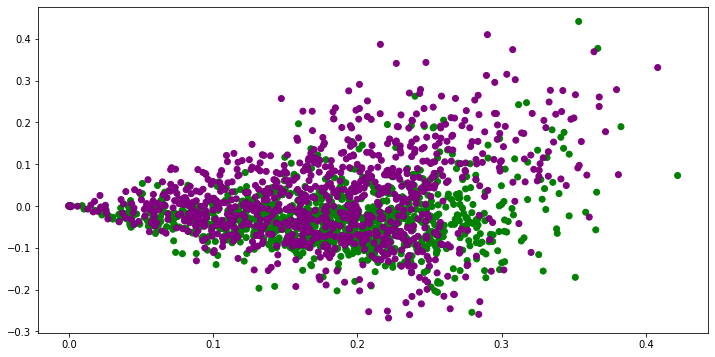

In [66]:
cdict = {'M':'green', 'F':'purple'}
colors = y.map(cdict)[:1906]

plt.figure(figsize=(12,6))
plt.scatter(x_svd[:1906, 0], x_svd[:1906, 1], c=colors)
# let's just plot 50
plt.show()

**Observations with clustering**:
- With my first pass, it seems that **Male** lyrics (green) and **Female** lyrics (purple) seem to cluster nearly right on top of each other!
    - there are some more variation with the **Female** cluster
    - the **Male** cluster is a bit more condensed
- This goes against my original hypothesis that there is a difference.
- This doesn't mean that there isn't a difference but from this first pass, this suggests as such...

### NMF Topic Modeling

In [58]:
# custom function for print out topics
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))

In [67]:
documents = all_lyrics_df.lyrics

num_feats = 10000
num_tops = 5

# NMF can use tf_idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_feats, 
                                   stop_words='english')
tfidf_docs = tfidf_vectorizer.fit_transform(documents)

# Run NMF
nmf_model = NMF(n_components=num_tops, random_state=1, alpha=.1, l1_ratio=.5,
               init='nndsvd').fit(tfidf_docs)
display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 15)

Topic 0:
like don know got just ain love cause ya man let come want time wanna
Topic 1:
bitch bitches bad ayy fuck yeah hoes shit pussy like ain ah ass dick hoe
Topic 2:
oh yeah ooh baby know make girl come movin just boy higher ooo rico ve
Topic 3:
nigga niggas shit fuck ass real man em ain motherfucker thug motherfuckin tryna fuckin motherfuckers
Topic 4:
la lah man uh blah ooh timbaland boom way tell queen music blow shoulda style


These topics are very interesting. lot's of adlibs!
- let's add some stop_words to remove them from the analysis
- the tokenizer still split the contractions sadly...

In [71]:
stop_words = stopwords.words('english')
stop_words.extend(['boom', 'biggie', 'rico', '2pac', 'll', 'wanna', 'ooh', 'lil', 'hey',
                  'woo', 'don', 'im', 'yo', 'la', 'dogg', 'nah', 'em', 'like', 'uhh',
                  'uh', 'huh', 'ha', 'ah', 'hmm', 'haha', 'missy', 'ayy', 'kim', 'remy',
                  'whoa', 'oh', 'yeah'])

In [72]:
# NMF can use tf_idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_feats, 
                                   stop_words=stop_words)
tfidf_docs = tfidf_vectorizer.fit_transform(documents)

# Run NMF
nmf_model = NMF(n_components=num_tops, random_state=1, alpha=.1, l1_ratio=.5,
               init='nndsvd').fit(tfidf_docs)
display_topics(nmf_model, tfidf_vectorizer.get_feature_names(), 15)

Topic 0:
get know got back see man go cause ya let one make come shit never
Topic 1:
bitch bitches bad fuck hoes shit pussy ass dick hoe money ho fuckin got fucking
Topic 2:
nigga niggas shit fuck ass real motherfucker man motherfuckin thug tryna brooklyn fuckin motherfuckers pussy
Topic 3:
love would away day make kind feelings crazy enough give right bible true stay long
Topic 4:
baby go away want lights know rockstar walk come turn cause mine tell spell leave


In [73]:
# let's try LDA
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, 
                                max_features=num_feats, stop_words=stop_words)
tf_docs = tf_vectorizer.fit_transform(documents)

# Run LDA
lda_model = LatentDirichletAllocation(n_components=num_tops, max_iter=5, 
                                      learning_method='online', learning_offset=50.,
                                     random_state=0).fit(tf_docs)
display_topics(lda_model, tf_vectorizer.get_feature_names(), 15)

Topic 0:
da pa mi dig said dream clear jesus hole dang shitted que hov ram pam
Topic 1:
get got know bitch nigga shit niggas fuck cause see go back let make love
Topic 2:
black us day life back never people love one world see god nigga could niggas
Topic 3:
go ody cardi amazing pom hard love tat freak ballin funk got know body sw
Topic 4:
stay dreams blazin bed put brooklyn barbie heel daddy bottoms nigga whuteva long way gene


### Can these topic models be improved?
- It took many steps and modifications to get to these topic models
    - addition of several stop words, tokenization issues
- However, 

### Still Lot's of Stuff To-Do
- **Topic Modeling**
    - improve the model(s)!
    - create thematic topic labels 
    - create a data frame with the topic values and add to the all_lyrics_df
    - I want to do topics by artist and still gender just to see the patterning
    - I will plot these to see what it looks like
- **Thematic Representation**
    - word clouds!
        - male, female, all